# Hyperparameter Optimization

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Exploring the Data

In [2]:
train_df = pd.read_csv('dc_airbnb_train.csv')
train_df.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,-0.596544,-0.249467,-0.439151,-0.546858,125.0,-0.341375,-0.016604,4.579650
1,-0.596544,-0.249467,0.412923,-0.546858,85.0,-0.341375,-0.016603,1.159275
2,-1.095499,-0.249467,-1.291226,-0.546858,50.0,-0.341375,-0.016573,-0.482505
3,-0.596544,-0.249467,-0.439151,-0.546858,209.0,0.487635,-0.016584,-0.448301
4,4.393004,4.507903,1.264998,2.829956,215.0,-0.065038,-0.016553,0.646219


In [3]:
test_df = pd.read_csv('dc_airbnb_test.csv')
test_df.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,-0.596544,-1.438810,-0.439151,-0.546858,105.0,-0.341375,-0.016548,-0.243079
1,0.900320,0.939875,1.264998,0.297345,309.0,0.487635,-0.016594,-0.243079
2,-0.596544,-0.249467,2.117072,-0.546858,55.0,-0.341375,-0.016573,0.714626
3,-0.596544,-0.249467,-0.439151,-0.546858,180.0,-0.341375,-0.016573,-0.448301
4,-0.596544,-0.249467,-0.439151,-0.546858,130.0,-0.341375,-0.016573,-0.448301


### Hyperparameter Optimization

In [4]:
hyper_params = [1,2,3,4,5]

In [5]:
mse_values = []

for p in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = p, algorithm = 'brute')
    knn.fit(train_df[['accommodates','bedrooms','bathrooms','number_of_reviews']], train_df['price'])
    predictions = knn.predict(test_df[['accommodates','bedrooms','bathrooms','number_of_reviews']])
    mse_values.append(mean_squared_error(test_df['price'], predictions))
    
print(mse_values)

[26364.92832764505, 15100.52246871445, 14578.804070281883, 15946.721060864618, 14119.735836177475]


In [6]:
np.min(mse_values)

14119.735836177475

### Expand grid search

In [7]:
hyper_params = [x for x in range(1, 21)]

In [8]:
mse_values = []

for p in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = p, algorithm = 'brute')
    knn.fit(train_df[['accommodates','bedrooms','bathrooms','number_of_reviews']], train_df['price'])
    predictions = knn.predict(test_df[['accommodates','bedrooms','bathrooms','number_of_reviews']])
    mse_values.append(mean_squared_error(test_df['price'], predictions))
    
print(mse_values)

[26364.92832764505, 15100.52246871445, 14578.804070281883, 15946.721060864618, 14119.735836177475, 13495.78156996587, 14209.360474565252, 14615.818988196814, 14591.371971516453, 14608.888509670078, 14747.643537453343, 14802.514876437872, 14726.607851848858, 14788.004486777645, 14775.071925167487, 14846.632372546928, 14801.420334526101, 14761.434233626876, 14750.644695086017, 14653.391259954493]


In [9]:
np.min(mse_values)

13495.78156996587

### Visualizing hyperparameter values

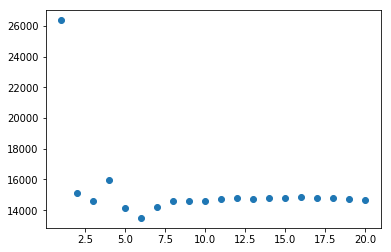

In [10]:
plt.scatter(hyper_params, mse_values)
plt.show()

**The lowest MSE value was achieved at the k value of 6.**

### Using all features

In [11]:
features = train_df.columns.tolist()
features.remove('price')

In [12]:
mse_values = []

for p in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = p, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)

In [13]:
np.min(mse_values)

14719.231367350201

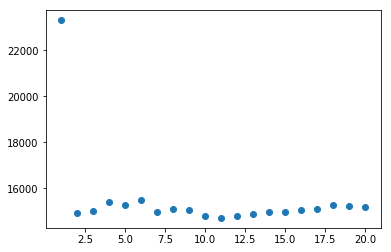

In [14]:
plt.scatter(hyper_params, mse_values)
plt.show()

### Varying features

In [15]:
# Using two features

mse_values = []

for p in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = p, algorithm='brute')
    knn.fit(train_df[['accommodates', 'bathrooms']], train_df['price'])
    predictions = knn.predict(test_df[['accommodates', 'bathrooms']])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)

In [16]:
np.min(mse_values)

14790.314266211606

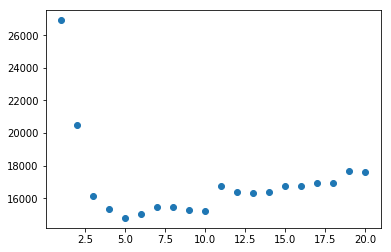

In [17]:
plt.scatter(hyper_params, mse_values)
plt.show()

In [19]:
# Using three features

mse_values = []

for p in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = p, algorithm='brute')
    knn.fit(train_df[['accommodates', 'bathrooms', 'bedrooms']], train_df['price'])
    predictions = knn.predict(test_df[['accommodates', 'bathrooms', 'bedrooms']])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)

In [20]:
np.min(mse_values)

13518.769009310208

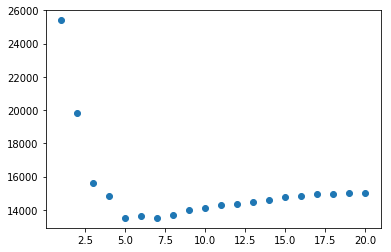

In [21]:
plt.scatter(hyper_params, mse_values)
plt.show()